<span>
<img src="http://www.sobigdata.eu/sites/default/files/logo-SoBigData-DEFINITIVO.png" width="180px" align="right"/>
</span>
<span>
**Author:** Giulio Rossetti (giulio.rossetti@gmail.com)<br/>
**Python version:**  3.x<br/>
**Last update:** 12/12/2017
</span>

# Case Study Summary
The sinking of the Titanic is one of the most infamous shipwrecks in history. On April 15, 1912, during her maiden voyage, the Titanic sank after colliding with an iceberg, killing 1502 out of 2224 passengers and crew. This sensational tragedy shocked the international community and led to better safety regulations for ships.

One of the reasons that the shipwreck led to such loss of life was that there were not enough lifeboats for the passengers and crew. Although there was some element of luck involved in surviving the sinking, some groups of people were more likely to survive than others, such as women, children, and the upper-class.

In this notebook, we will try to figure out what sorts of people were likely to survive. 

## 1. Importing Libraries

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import scipy as sp
import sklearn as sk
import matplotlib.pylab as plt
import seaborn as sns
from pandas.tools.plotting import scatter_matrix
import warnings
warnings.filterwarnings("ignore")

/usr/local/lib/python3.5/dist-packages/matplotlib/__init__.py:800: MatplotlibDeprecationWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  mplDeprecation)


## 2. Data description

In [2]:
titanic = pd.read_csv("data/titanic.csv")
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


 - The **Survived** variable is our outcome or dependent variable. It is a binary nominal datatype of 1 for survived and 0 for did not survive. All other variables are potential predictor or independent variables. It's important to note, more predictor variables do not make a better model, but the right variables.
 - The **PassengerID** and **Ticket** variables are assumed to be random unique identifiers, that have no impact on the outcome variable. Thus, they will be excluded from analysis.
 - The **Pclass** variable is an ordinal datatype for the ticket class, a proxy for socio-economic status (SES), representing 1 = upper class, 2 = middle class, and 3 = lower class.
 - The **Name** variable is a nominal datatype. It could be used in feature engineering to derive the gender from title, family size from surname, and SES from titles like doctor or master. Since these variables already exist, we'll make use of it to see if title, like master, makes a difference.
 - The **Sex** and **Embarked** variables are a nominal datatype. They will be converted to dummy variables for mathematical calculations.
 - The **Age** and **Fare** variable are continuous quantitative datatypes.
 - The **SibSp** represents number of related siblings/spouse aboard and **Parch** represents number of related parents/children aboard. Both are discrete quantitative datatypes. This can be used for feature engineering to create a family size and is alone variable.
 - The **Cabin** variable is a nominal datatype that can be used in feature engineering for approximate position on ship when the incident occurred and SES from deck levels. However, since there are many null values, it does not add value and thus is excluded from analysis.

## 3. Data Cleaning: Correcting, Completing, Creating, and Converting

In this stage, we will clean our data by 
 1. correcting aberrant values and outliers, 
 2. completing missing information, 
 3. creating new features for analysis, and 
 4. converting fields to the correct format for calculations and presentation.

**Correcting:** Reviewing the data, there does not appear to be any aberrant or non-acceptable data inputs.

**Completing:** Are there null values or missing data?

**Creating:** Feature engineering is when we use existing features to create new features to determine if they provide new signals to predict our outcome. 

**Converting:** Last, but certainly not least, we'll deal with formatting. Our categorical data imported as objects, which makes it difficult for mathematical calculations. We will convert object datatypes to categorical dummy variables.

### 3.A Correcting

In [3]:
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [4]:
titanic.describe(include = 'all')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Duff Gordon, Sir. Cosmo Edmund (""Mr Morgan"")",male,NaN,NaN,NaN,347082,NaN,G6,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


#### Cleaning

In [5]:
titanic['Age'].fillna(titanic['Age'].median(), inplace = True)
titanic['Embarked'].fillna(titanic['Embarked'].mode()[0], inplace = True)
titanic['Fare'].fillna(titanic['Fare'].median(), inplace = True)

In [6]:
drop_column = ['PassengerId','Cabin', 'Ticket']
titanic.drop(drop_column, axis=1, inplace = True)

In [7]:
titanic.isnull().sum()

Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

#### Creating
In order to better explicitate information hidden in the original data we engenier some new features

In [8]:
# Discrete variables
titanic['FamilySize'] = titanic ['SibSp'] + titanic['Parch'] + 1
titanic['IsAlone'] = 1 # initialize to yes/1 is alone
titanic['IsAlone'].loc[titanic['FamilySize'] > 1] = 0 # now update to no/0 if family size is greater than 1

titanic[['FamilySize', 'IsAlone']].head()

,FamilySize,IsAlone
0,2,0
1,2,0
2,1,1
3,2,0
4,1,1


In [9]:
#Continuous variable binning 
titanic['FareBin'] = pd.qcut(titanic['Fare'], 4) # qcut: frequency bins
titanic['AgeBin'] = pd.cut(titanic['Age'].astype(int), 5) # cut: equal size value bins

titanic[['Fare', 'FareBin', 'Age', 'AgeBin']].head()

,Fare,FareBin,Age,AgeBin
0,7.2500,"(-0.001, 7.91]",22.0,"(16.0, 32.0]"
1,71.2833,"(31.0, 512.329]",38.0,"(32.0, 48.0]"
2,7.9250,"(7.91, 14.454]",26.0,"(16.0, 32.0]"
3,53.1000,"(31.0, 512.329]",35.0,"(32.0, 48.0]"
4,8.0500,"(7.91, 14.454]",35.0,"(32.0, 48.0]"


In [10]:
# Identify title names (Mr. Miss. Mrs. etx)
# Split title from name
titanic['Title'] = titanic['Name'].str.split(", ", expand=True)[1].str.split(".", expand=True)[0]

titanic[['Name', 'Title']].head()

,Name,Title
0,"Braund, Mr. Owen Harris",Mr
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",Mrs
2,"Heikkinen, Miss. Laina",Miss
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",Mrs
4,"Allen, Mr. William Henry",Mr


In [11]:
# cleanup rare title names
stat_min = 10 
title_names = (titanic['Title'].value_counts() < stat_min) # create a true false series with title name as index
titanic['Title'] = titanic['Title'].apply(lambda x: 'Misc' if title_names.loc[x] == True else x)

titanic['Title'].value_counts()

Mr        517
Miss      182
Mrs       125
Master     40
Misc       27
Name: Title, dtype: int64

#### Converting
Convert objects to category using Label Encoder

In [12]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

#code categorical data
label = LabelEncoder()
titanic['Sex_Code'] = label.fit_transform(titanic['Sex'])
titanic['Embarked_Code'] = label.fit_transform(titanic['Embarked'])
titanic['Title_Code'] = label.fit_transform(titanic['Title'])
titanic['AgeBin_Code'] = label.fit_transform(titanic['AgeBin'])
titanic['FareBin_Code'] = label.fit_transform(titanic['FareBin'])

titanic.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,FamilySize,IsAlone,FareBin,AgeBin,Title,Sex_Code,Embarked_Code,Title_Code,AgeBin_Code,FareBin_Code
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,2,0,"(-0.001, 7.91]","(16.0, 32.0]",Mr,1,2,3,1,0
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,2,0,"(31.0, 512.329]","(32.0, 48.0]",Mrs,0,0,4,2,3
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,1,1,"(7.91, 14.454]","(16.0, 32.0]",Miss,0,2,2,1,1
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,2,0,"(31.0, 512.329]","(32.0, 48.0]",Mrs,0,2,4,2,3
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,1,1,"(7.91, 14.454]","(32.0, 48.0]",Mr,1,2,3,2,1


### 3.B Perform Exploratory Analysis with Statistics
Now that our data is cleaned, we will explore our data with descriptive and graphical statistics to describe and summarize our variables. 

In [13]:
# Target label
Target = ['Survived']

titanic_1 = titanic[['Sex','Pclass', 'Embarked', 'Title','SibSp', 'Parch', 'Age', 'Fare', 'FamilySize', 'IsAlone', 'Survived']]
titanic_1.head()

,Sex,Pclass,Embarked,Title,SibSp,Parch,Age,Fare,FamilySize,IsAlone,Survived
0,male,3,S,Mr,1,0,22.0,7.2500,2,0,0
1,female,1,C,Mrs,1,0,38.0,71.2833,2,0,1
2,female,3,S,Miss,0,0,26.0,7.9250,1,1,1
3,female,1,S,Mrs,1,0,35.0,53.1000,2,0,1
4,male,3,S,Mr,0,0,35.0,8.0500,1,1,0


In [14]:
#Discrete Variable Correlation by Survival using
for x in titanic_1:
    if titanic_1[x].dtype != 'float64' and x!=Target[0]:
        print('\nSurvival Correlation by:', x)
        cor = titanic_1[[x, Target[0]]].groupby(x, as_index=False).mean()
        print(cor)
        

#using crosstabs: https://pandas.pydata.org/pandas-docs/stable/generated/pandas.crosstab.html
#print(pd.crosstab(titanic['Title'],titanic[Target[0]]))


Survival Correlation by: Sex
      Sex  Survived
0  female  0.742038
1    male  0.188908

Survival Correlation by: Pclass
   Pclass  Survived
0       1  0.629630
1       2  0.472826
2       3  0.242363

Survival Correlation by: Embarked
  Embarked  Survived
0        C  0.553571
1        Q  0.389610
2        S  0.339009

Survival Correlation by: Title
    Title  Survived
0  Master  0.575000
1    Misc  0.444444
2    Miss  0.697802
3      Mr  0.156673
4     Mrs  0.792000

Survival Correlation by: SibSp
   SibSp  Survived
0      0  0.345395
1      1  0.535885
2      2  0.464286
3      3  0.250000
4      4  0.166667
5      5  0.000000
6      8  0.000000

Survival Correlation by: Parch
   Parch  Survived
0      0  0.343658
1      1  0.550847
2      2  0.500000
3      3  0.600000
4      4  0.000000
5      5  0.200000
6      6  0.000000

Survival Correlation by: FamilySize
   FamilySize  Survived
0           1  0.303538
1           2  0.552795
2           3  0.578431
3           4  0.724138
4

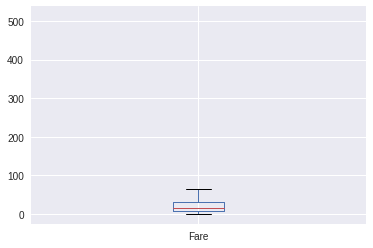

In [15]:
titanic_1.boxplot(['Fare'])

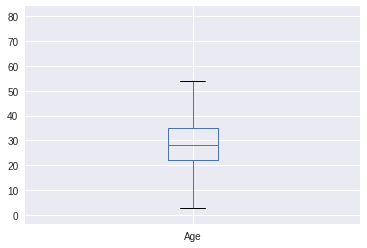

In [16]:
titanic_1.boxplot(['Age'])

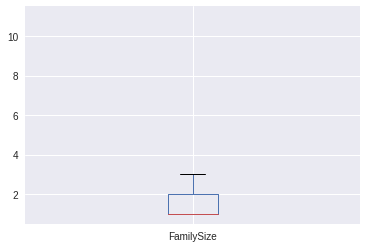

In [17]:
titanic_1.boxplot(['FamilySize'])

In [18]:
def conditional_histogram(df, column):

    booldf1 = pd.DataFrame(titanic[titanic['Survived']==0][column])
    booldf1.columns = ['Dead']
    booldf2 = pd.DataFrame(titanic[titanic['Survived']==1][column])
    booldf2.columns = ['Survived']
    row_concat = pd.concat([booldf1, booldf2], axis=1)

    ax = row_concat.plot.hist(stacked=True)
    ax.set_xlabel(column)

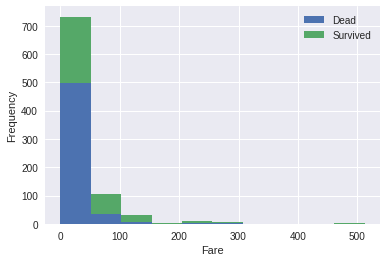

In [19]:
conditional_histogram(titanic, 'Fare')

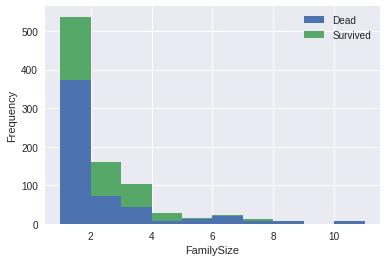

In [20]:
conditional_histogram(titanic, 'FamilySize')

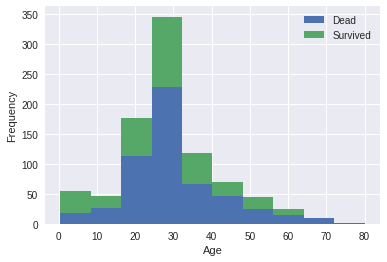

In [21]:
conditional_histogram(titanic, 'Age')

In [22]:
def conditional_bar_plot(df, columns, by):
    t1 = pd.DataFrame(df[columns].groupby(by).sum())
    t1.columns = ['Survived']
    t2 = pd.DataFrame(titanic[columns].groupby(by).count())
    t2.columns = ['Total']
    row_concat = pd.concat([t1, t2], axis=1)
    row_concat['Percentage'] = row_concat['Survived'] / row_concat['Total']
    return row_concat['Percentage'].plot.bar()

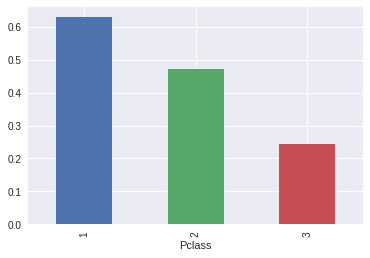

In [23]:
conditional_bar_plot(titanic, ['Survived', 'Pclass'], ['Pclass'])

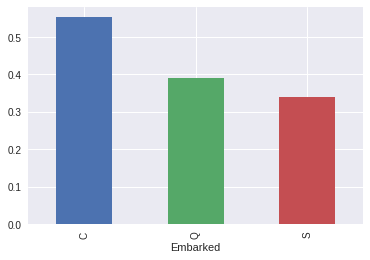

In [24]:
conditional_bar_plot(titanic, ['Survived', 'Embarked'], ['Embarked'])

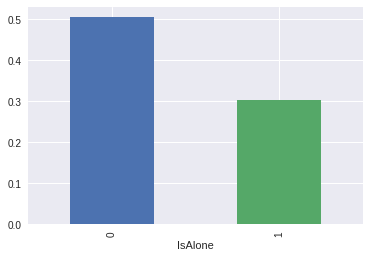

In [25]:
conditional_bar_plot(titanic, ['Survived', 'IsAlone'], ['IsAlone'])

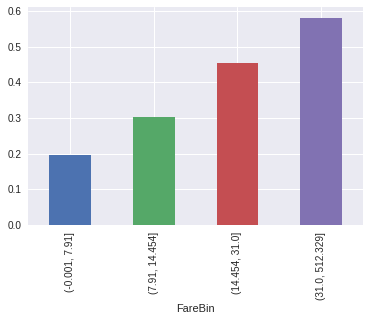

In [26]:
conditional_bar_plot(titanic, ['Survived', 'FareBin'], ['FareBin'])

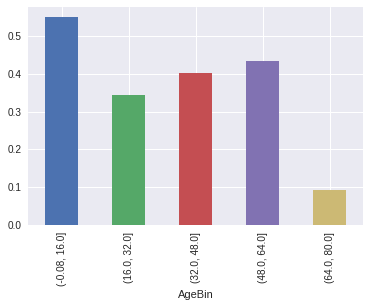

In [27]:
conditional_bar_plot(titanic, ['Survived', 'AgeBin'], ['AgeBin'])

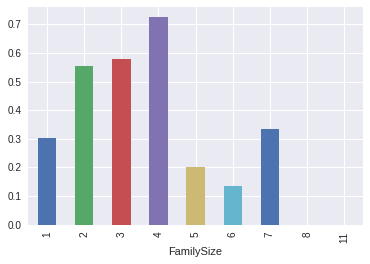

In [28]:
conditional_bar_plot(titanic, ['Survived', 'FamilySize'], ['FamilySize'])

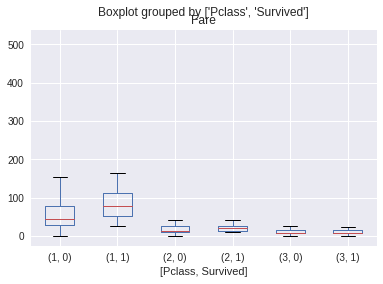

In [29]:
titanic.boxplot(['Fare'], by=['Pclass', 'Survived'])

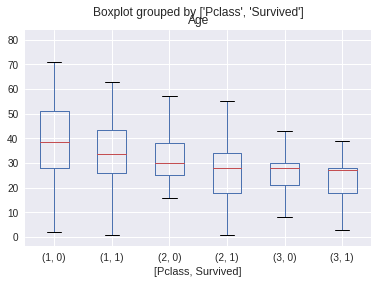

In [30]:
titanic.boxplot(['Age'], by=['Pclass', 'Survived'])

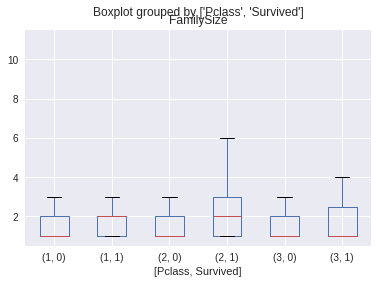

In [31]:
titanic.boxplot(['FamilySize'], by=['Pclass', 'Survived'])

In [32]:
def grouped_barchart(df, grouping, target='Survived'): 

    t2 = pd.DataFrame(df.groupby(grouping+[target])['FamilySize'].count())
    t2 = t2.reset_index()
    ts = t2[t2[target]==1]
    td = t2[t2[target]==0]
    ts.columns = grouping+[target]+['S']
    td.columns = grouping+[target]+['D']
    tj = ts.merge(td, on=grouping, how='left')
    tj['RatioSurvived'] = tj['S'] / (tj['S'] + tj['D'])
    tj.plot.bar(x=grouping, y='RatioSurvived')


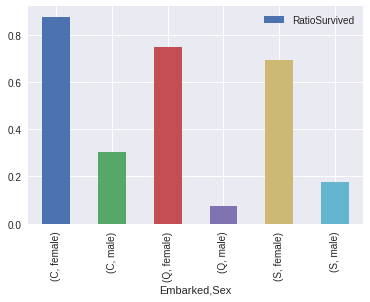

In [33]:
grouped_barchart(titanic, ["Embarked", "Sex"], "Survived")

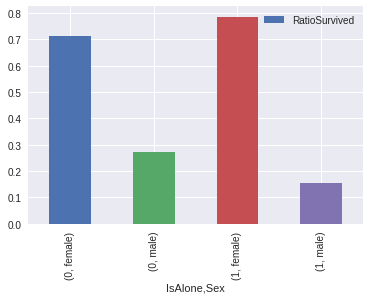

In [34]:
grouped_barchart(titanic, ["IsAlone", "Sex"], "Survived")

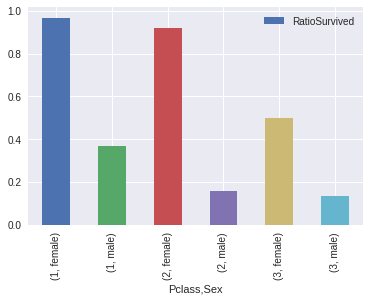

In [35]:
grouped_barchart(titanic, ["Pclass", "Sex"], "Survived")

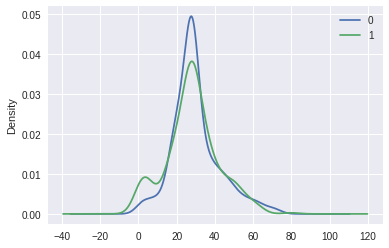

In [36]:
ax = titanic.groupby(['Survived']).Age.plot.kde()
plt.legend()

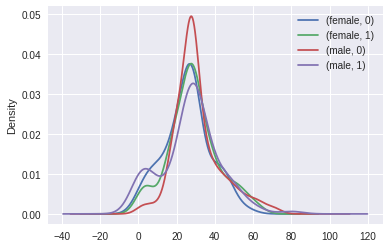

In [37]:
ax = titanic.groupby(['Sex', 'Survived']).Age.plot.kde()
plt.legend()

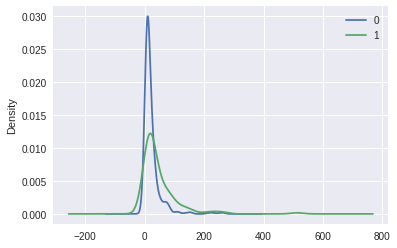

In [38]:
ax = titanic.groupby(['Survived']).Fare.plot.kde()
plt.legend()

In [39]:
from pandas.plotting import scatter_matrix

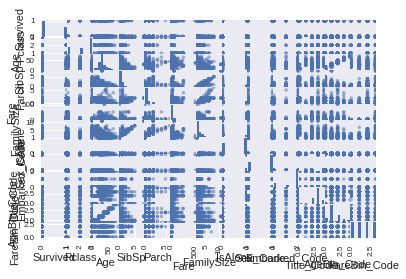

In [40]:
sm = scatter_matrix(titanic)

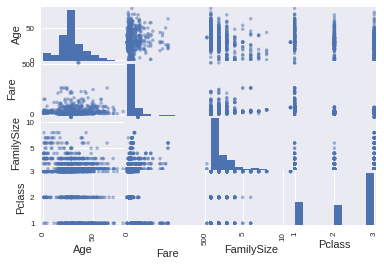

In [41]:
sm = scatter_matrix(titanic[['Age', 'Fare', 'FamilySize', 'Pclass']])

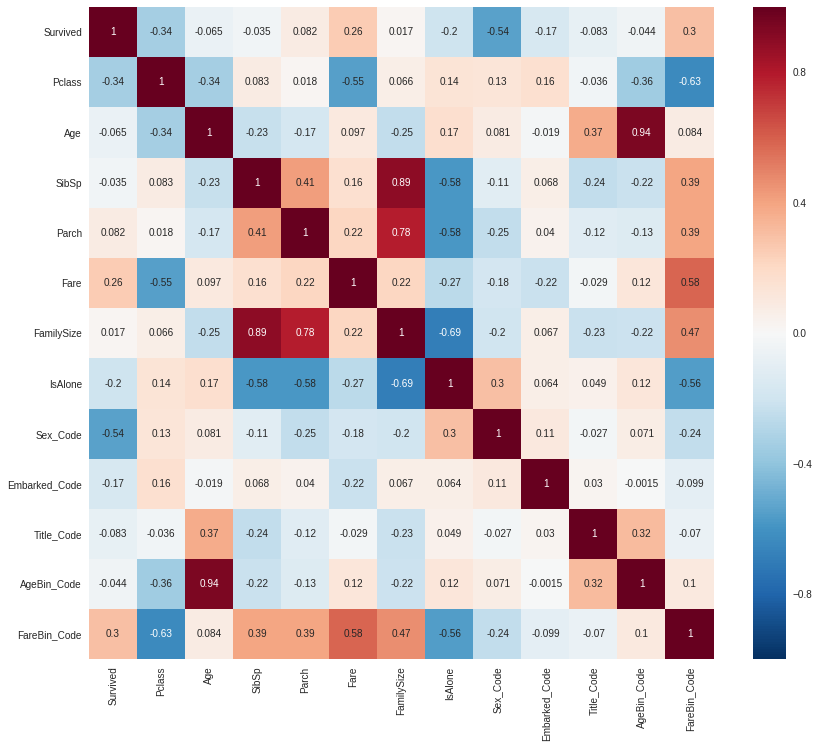

In [43]:
import seaborn as sns
corr = titanic.corr()
plt.subplots(figsize =(14, 12))
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values, annot=True)

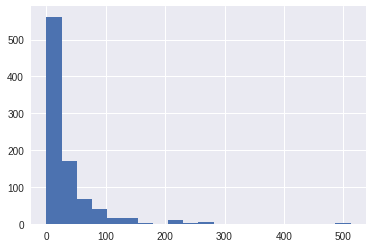

In [44]:
titanic['Fare'].hist(bins=20)

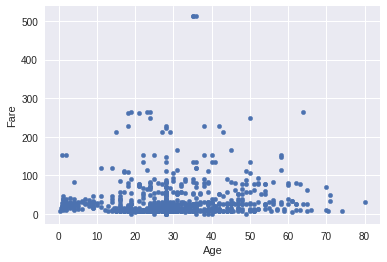

In [45]:
titanic.plot.scatter(x='Age', y='Fare')

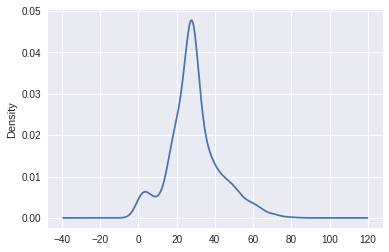

In [46]:
titanic['Age'].plot.kde()

In [47]:
sum_by_class = titanic.groupby('Embarked').sum()

Text(0,0.5,'Total')

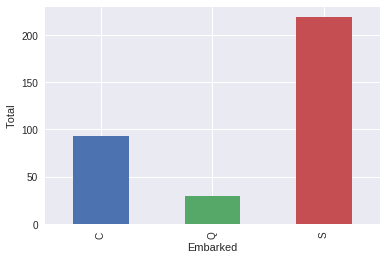

In [48]:
fig = sum_by_class['Survived'].plot.bar()
fig.set_ylabel('Total')

### Logistic Regression example

#### What is Logistic Regression?

Logistic regression is the appropriate regression analysis to conduct when the dependent variable is dichotomous (binary, as is 'Survived' in our case). 

Like all regression analyses, the logistic regression is a predictive analysis.  Logistic regression is used to describe data and to explain the relationship between one dependent binary variable and one or more nominal, ordinal, interval or ratio-level independent variables.

At the center of the logistic regression analysis is the task estimating the log odds of an event.

Mathematically, logistic regression estimates a multiple linear regression function defined as:

$$logit(p) = \beta_0 + \beta_1 x_1 + \beta_2 x_2 + \dots \beta_n x_n $$

First we drop the target variable, 'survived', from the training set -- we store the target variable in its own dataframe. We also make a copy of the testing set

In [67]:
titanic_regression = titanic[['Survived', 'Pclass', 'Age', 'Fare', 'FamilySize', 'IsAlone', 
                                     'Sex_Code', 'Embarked_Code', 'Title_Code', 'AgeBin_Code', 'FareBin_Code']]

X_train = titanic_regression.drop("Survived",axis=1)
Y_train = titanic_regression["Survived"]

Heavy lifting for logistic regression is done behind the scene by scikit-learn, a python library. We take advantage of this abstractness. For validation purposes we split out training set into 0.75 - 0.25 for training-validating.

In [68]:
from sklearn.cross_validation import train_test_split

In [69]:
x_train, x_holdout, y_train, y_holdout = train_test_split(X_train, Y_train)

In [70]:
from sklearn.linear_model import LogisticRegression

In [71]:
logreg = LogisticRegression()
logreg.fit(x_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

#### Evaluation

In [83]:
from sklearn.metrics import roc_curve, auc, roc_auc_score, confusion_matrix, f1_score

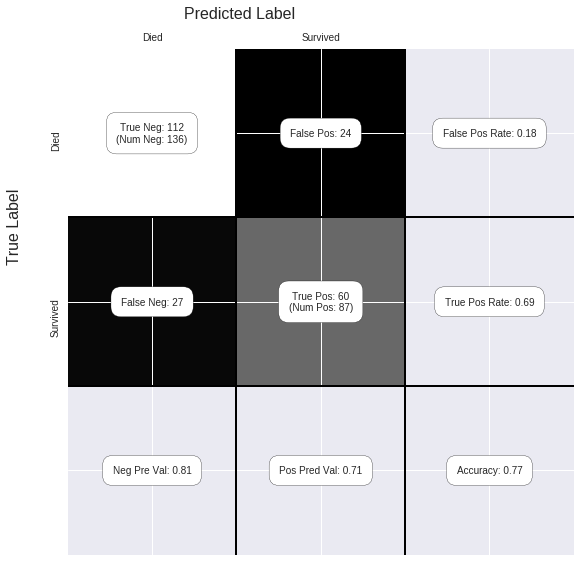

In [85]:
def show_confusion_matrix(C,class_labels=['0','1']):
    """
    C: ndarray, shape (2,2) as given by scikit-learn confusion_matrix function
    class_labels: list of strings, default simply labels 0 and 1.

    Draws confusion matrix with associated metrics.
    """
    import matplotlib.pyplot as plt
    import numpy as np
    assert C.shape == (2,2), "Confusion matrix should be from binary classification only."
    
    # true negative, false positive, etc...
    tn = C[0,0]; fp = C[0,1]; fn = C[1,0]; tp = C[1,1];

    NP = fn+tp # Num positive examples
    NN = tn+fp # Num negative examples
    N  = NP+NN

    fig = plt.figure(figsize=(8,8))
    ax  = fig.add_subplot(111)
    ax.imshow(C, interpolation='nearest', cmap=plt.cm.gray)

    # Draw the grid boxes
    ax.set_xlim(-0.5,2.5)
    ax.set_ylim(2.5,-0.5)
    ax.plot([-0.5,2.5],[0.5,0.5], '-k', lw=2)
    ax.plot([-0.5,2.5],[1.5,1.5], '-k', lw=2)
    ax.plot([0.5,0.5],[-0.5,2.5], '-k', lw=2)
    ax.plot([1.5,1.5],[-0.5,2.5], '-k', lw=2)

    # Set xlabels
    ax.set_xlabel('Predicted Label', fontsize=16)
    ax.set_xticks([0,1,2])
    ax.set_xticklabels(class_labels + [''])
    ax.xaxis.set_label_position('top')
    ax.xaxis.tick_top()
    
    # These coordinate might require some tinkering. Ditto for y, below.
    ax.xaxis.set_label_coords(0.34,1.06)

    # Set ylabels
    ax.set_ylabel('True Label', fontsize=16, rotation=90)
    ax.set_yticklabels(class_labels + [''],rotation=90)
    ax.set_yticks([0,1,2])
    ax.yaxis.set_label_coords(-0.09,0.65)


    # Fill in initial metrics: tp, tn, etc...
    ax.text(0,0,
            'True Neg: %d\n(Num Neg: %d)'%(tn,NN),
            va='center',
            ha='center',
            bbox=dict(fc='w',boxstyle='round,pad=1'))

    ax.text(0,1,
            'False Neg: %d'%fn,
            va='center',
            ha='center',
            bbox=dict(fc='w',boxstyle='round,pad=1'))

    ax.text(1,0,
            'False Pos: %d'%fp,
            va='center',
            ha='center',
            bbox=dict(fc='w',boxstyle='round,pad=1'))


    ax.text(1,1,
            'True Pos: %d\n(Num Pos: %d)'%(tp,NP),
            va='center',
            ha='center',
            bbox=dict(fc='w',boxstyle='round,pad=1'))

    # Fill in secondary metrics: accuracy, true pos rate, etc...
    ax.text(2,0,
            'False Pos Rate: %.2f'%(fp / (fp+tn+0.)),
            va='center',
            ha='center',
            bbox=dict(fc='w',boxstyle='round,pad=1'))

    ax.text(2,1,
            'True Pos Rate: %.2f'%(tp / (tp+fn+0.)),
            va='center',
            ha='center',
            bbox=dict(fc='w',boxstyle='round,pad=1'))

    ax.text(2,2,
            'Accuracy: %.2f'%((tp+tn+0.)/N),
            va='center',
            ha='center',
            bbox=dict(fc='w',boxstyle='round,pad=1'))

    ax.text(0,2,
            'Neg Pre Val: %.2f'%(1-fn/(fn+tn+0.)),
            va='center',
            ha='center',
            bbox=dict(fc='w',boxstyle='round,pad=1'))

    ax.text(1,2,
            'Pos Pred Val: %.2f'%(tp/(tp+fp+0.)),
            va='center',
            ha='center',
            bbox=dict(fc='w',boxstyle='round,pad=1'))


    plt.tight_layout()
    plt.show()

c = confusion_matrix(y_holdout, logreg.predict(x_holdout))
show_confusion_matrix(c, ['Died', 'Survived'])

In [84]:
f1_score(y_holdout, logreg.predict(x_holdout))

0.7017543859649122

In [86]:
roc_auc_score(y_holdout, logreg.predict(x_holdout))

0.7565922920892495

In [87]:
coeff_df = pd.DataFrame(titanic_regression.columns.delete(0))
coeff_df.columns = ['Features']
coeff_df["Coefficient Estimate"] = pd.Series(logreg.coef_[0])

coeff_df

,Features,Coefficient Estimate
0,Pclass,-0.489987
1,Age,-0.007379
2,Fare,0.001088
3,FamilySize,-0.455334
4,IsAlone,-0.344617
5,Sex_Code,-2.621873
6,Embarked_Code,-0.016263
7,Title_Code,-0.310562
8,AgeBin_Code,-0.135710
9,FareBin_Code,0.532255


In summary, we used the survival titanic data to train a classifier (a logistic model) that predicts survival of a passenger given several features. We split the training data-set by 0.75-0.25 into training and holdout examples. We performed dimensionality reduction by examining individual features and assessing how much impact they may have on the target variable. We evaluated the performance of our model by printing out a confusion matrix obtained from the holdout data-set. We also printed out the f1-score.